In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn import metrics

In [2]:
df = pd.read_csv('all_model_nlp.csv')

models = {
        'mf':['Model-Free'],
        'mb':['Model-Based'],
        'habit':['Habit'],
        'wsls':['Win Stay, Lose Shift'],
        'kdh':['k-Dominant Hand']
}

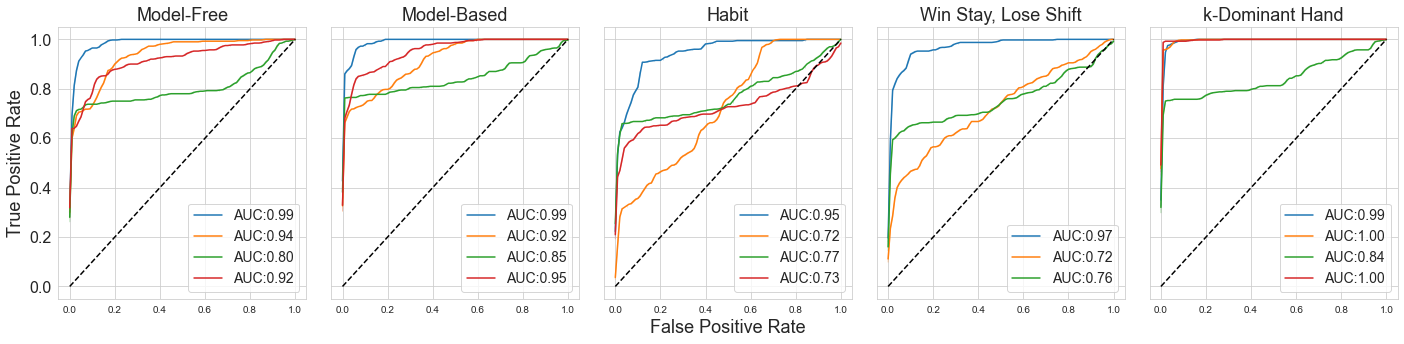

In [4]:
y_true = np.repeat([0,1,1,1,1],100)

sns.set_style("whitegrid")
fig = plt.figure(figsize=(24, 5))
gs = fig.add_gridspec(1,5, hspace=0, wspace=0.1 )
axes = gs.subplots(sharey=True)
for i,m in enumerate(models):

    fpr_r, tpr_r, _ = metrics.roc_curve(y_true,np.array(df[f'test_nlp_{m}'] - df['best_test_nlp_rnn']),drop_intermediate=False)
    fpr_r_100, tpr_r_100, _ = metrics.roc_curve(y_true, np.array(df[f'test_nlp_{m}'] - df['test_nlp_rnn_100']),drop_intermediate=False)
    fpr_r_1000, tpr_r_1000, _ = metrics.roc_curve(y_true, np.array(df[f'test_nlp_{m}'] - df['test_nlp_rnn_1000']),drop_intermediate=False)
   
    auc_r = metrics.auc(fpr_r, tpr_r)
    auc_100 = metrics.auc(fpr_r_100, tpr_r_100)
    auc_1000 = metrics.auc(fpr_r_1000, tpr_r_1000)
   
 
    sns.lineplot(ax=axes[i],x=fpr_r,y=tpr_r,color = sns.color_palette("tab10")[0])
    sns.lineplot(ax=axes[i],x=fpr_r_100,y=tpr_r_100,color = sns.color_palette("tab10")[1])
    sns.lineplot(ax=axes[i],x=fpr_r_1000,y=tpr_r_1000,color = sns.color_palette("tab10")[2])
    
    if i != 3:
        fpr_l, tpr_l, _ = metrics.roc_curve(y_true, np.array(df[f'test_nlp_{m}'] - df['test_nlp_logistic_regression']),drop_intermediate=False)
        auc_l = metrics.auc(fpr_l, tpr_l)
        sns.lineplot(ax=axes[i],x=fpr_l,y=tpr_l,color = sns.color_palette("tab10")[3])
        axes[i].legend([
                       'AUC:{:.2f}'.format(auc_r),
                       'AUC:{:.2f}'.format(auc_100),
                       'AUC:{:.2f}'.format(auc_1000),
                       'AUC:{:.2f}'.format(auc_l)],
                       fontsize=14)
    else:
        axes[i].legend([
               'AUC:{:.2f}'.format(auc_r),
               'AUC:{:.2f}'.format(auc_100),
               'AUC:{:.2f}'.format(auc_1000)],
               fontsize=14)
        
    sns.lineplot(ax=axes[i],x=[0, 1],y= [0, 1], color="k",ls='--')
    axes[i].set_title(models[m][0],size=18)
    
    y_true = np.roll(y_true,100) 
    
axes[0].set_ylabel('True Positive Rate',size=18)
axes[2].set_xlabel("False Positive Rate",size=18)
axes[0].tick_params(axis='y', which='major', labelsize=16)

a = mpatches.Patch(color=sns.color_palette("tab10")[0], label='RNN Early Stopping')
b = mpatches.Patch(color=sns.color_palette("tab10")[1], label='RNN 100 Epoch')
c = mpatches.Patch(color=sns.color_palette("tab10")[2], label='RNN 1000 Epoch')
d = mpatches.Patch(color=sns.color_palette("tab10")[3], label='Logistic Regression')
# plt.legend(handles=[a,b,c,d],fontsize=16, ncol = 4,bbox_to_anchor=(0, 1.4))
# axes[2].legend(handles=[a,b,c,d],fontsize=16, ncol = 7,bbox_to_anchor=(2, 1.3))